# PCA

## Task 1: Exploratory Data Analysis (EDA):

#### 1.	Load the dataset and perform basic data exploration.

In [62]:
#import pandas,numpy and warnings library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [63]:
#Load the csv file
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
#Find the shape of the dataset
df.shape

(178, 14)

In [65]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [66]:
#check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [67]:
#Get the dataset summary
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [68]:
#Check for null values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [69]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

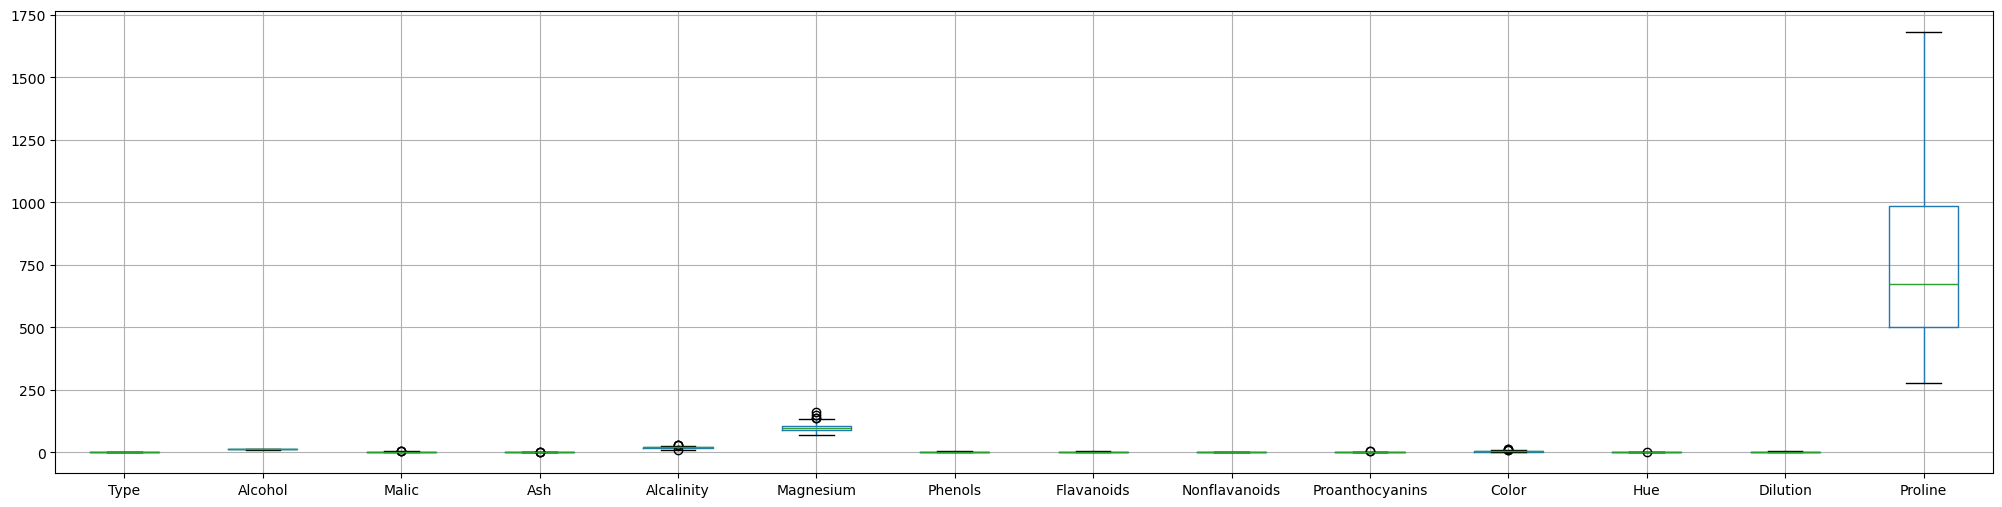

In [70]:
#Check for outliers
plt.figure(figsize=(25, 6))
df.boxplot()

In [71]:
#Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

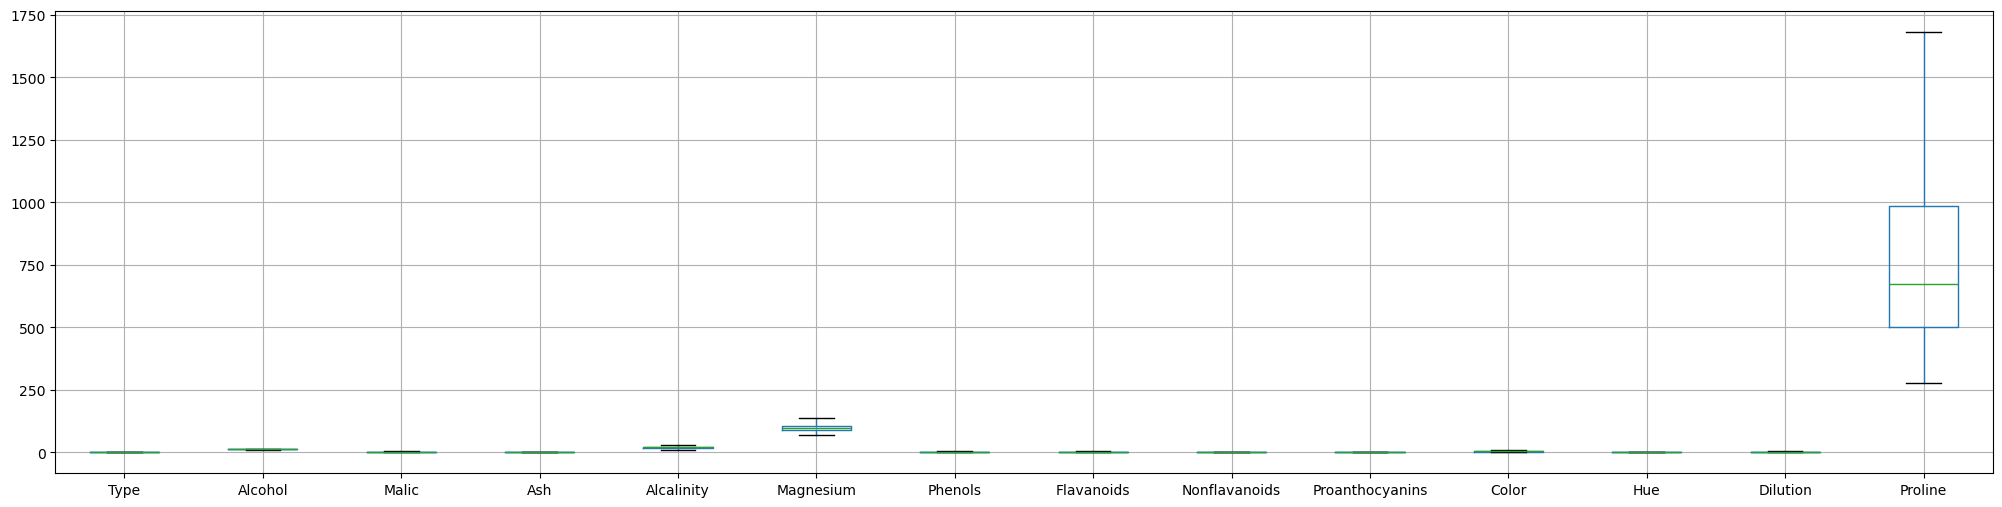

In [72]:
#recheck for outliers
plt.figure(figsize=(25, 6))
df.boxplot()

#### 2.	Examine the distribution of features using histograms, box plots, or density plots.

##### **Histogram**

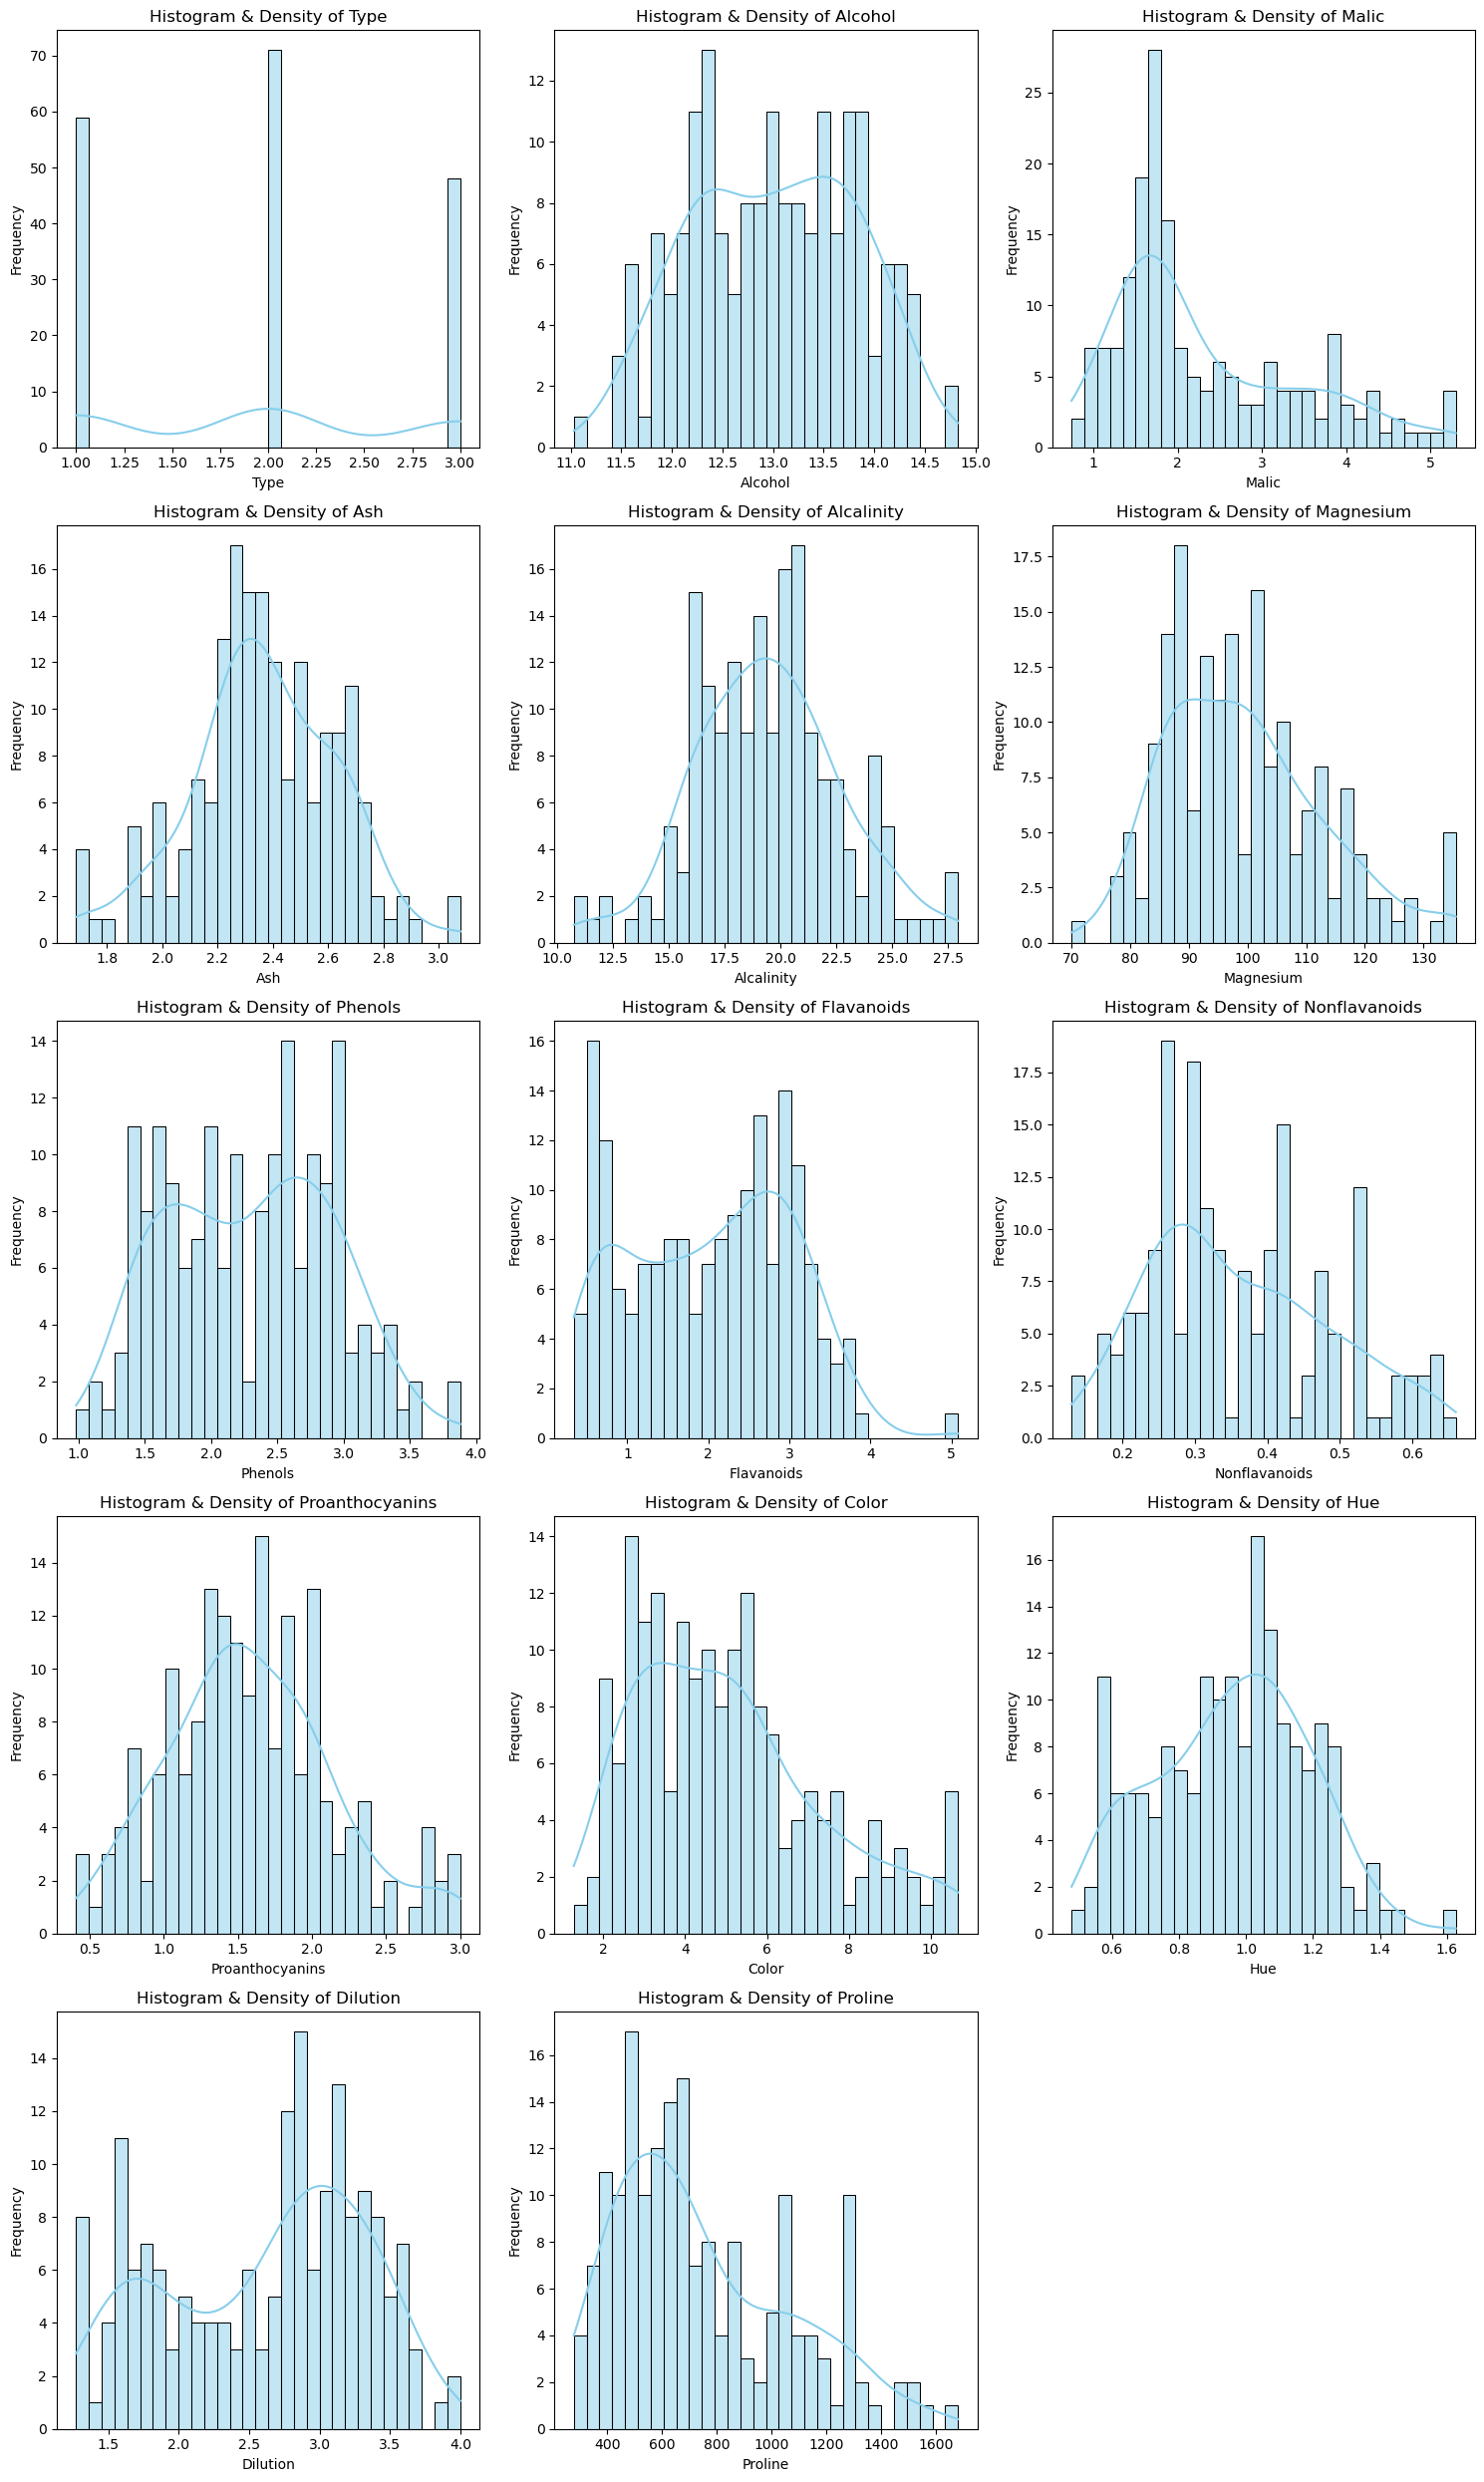

In [74]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Set up grid
n_cols = 3   # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
#Plot histogram
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='Skyblue')
    plt.title(f'Histogram & Density of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### 3.	Investigate correlations between features to understand relationships within the data.

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


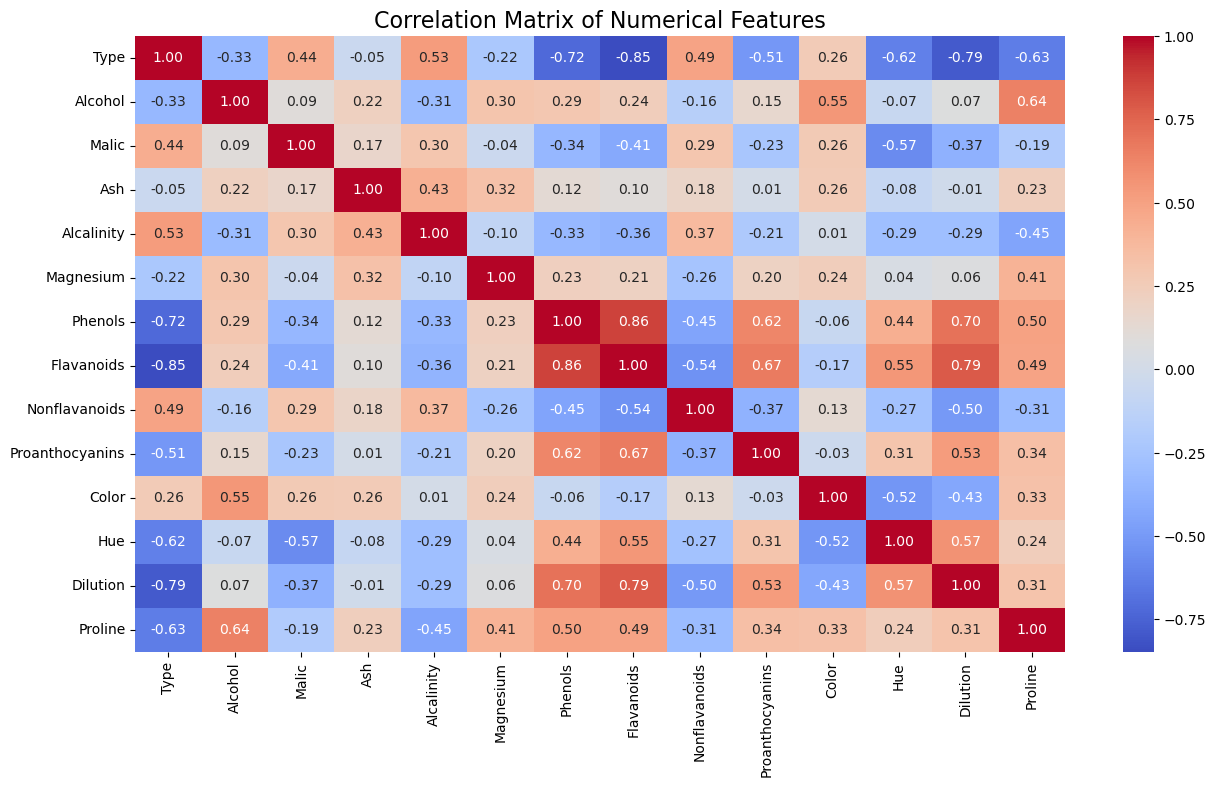

In [75]:
#Correlation metrics
corr=df.corr()
display(corr)

#plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Task 2: Dimensionality Reduction with PCA:

#### 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [76]:
target = df['Type']
features = df.drop(columns=['Type'])

In [78]:
#import standardization
from sklearn.preprocessing import StandardScaler
# apply standardization
scaler = StandardScaler()
df_scaled_data = scaler.fit_transform(features)
# Convert back to DataFrame with same columns and index
df_scaled = pd.DataFrame(df_scaled_data, columns=features.columns, index=features.index)
df_scaled.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


##### **Implement PCA**

In [80]:
from sklearn.decomposition import PCA

# Instantiate PCA (leaving n_components unspecified for now)
pca = PCA()

# Fit PCA to the scaled data
pca.fit(df_scaled)

# Transform the scaled data
#df_pca = pca.transform(df_scaled)

PCA()

#### 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

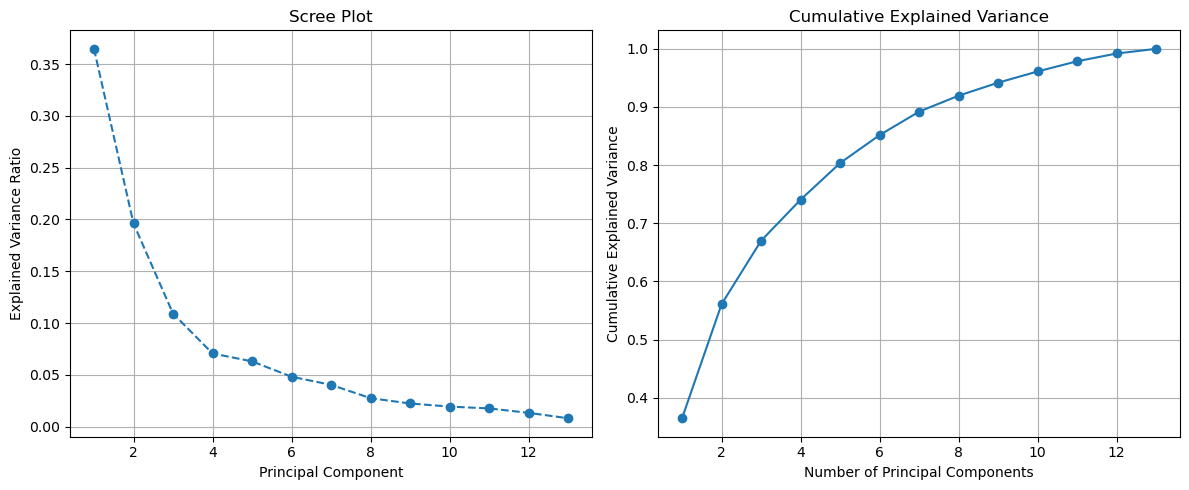

Explained Variance Ratio:
 [0.36475803 0.19609775 0.10911182 0.07062378 0.06296983 0.04815067
 0.04031504 0.02744533 0.02232516 0.01931106 0.01755433 0.01326634
 0.00807088]

Cumulative Explained Variance:
 [0.36475803 0.56085577 0.66996759 0.74059137 0.8035612  0.85171187
 0.89202691 0.91947224 0.9417974  0.96110846 0.97866279 0.99192912
 1.        ]


In [81]:
# 1. Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# 2. Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a range for principal component indices
principal_components = range(1, len(explained_variance_ratio) + 1)

# 3. Create Scree Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(principal_components, explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# 4. Create Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)
plt.plot(principal_components, cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Explained Variance Ratio:\n", explained_variance_ratio)
print("\nCumulative Explained Variance:\n", cumulative_explained_variance)

#### 3.	Transform the original dataset into the principal components.

In [82]:
# Optimal number of components 
optimal_n_components = 8

# Instantiate PCA with the optimal number of components
pca_final = PCA(n_components=optimal_n_components)

# Fit and transform the scaled data
df_pca_final_array = pca_final.fit_transform(df_scaled)

# Create a new DataFrame for the transformed data
pca_column_names = [f'PC{i+1}' for i in range(optimal_n_components)]
df_pca_final = pd.DataFrame(df_pca_final_array, columns=pca_column_names, index=df.index)

print(f"DataFrame 'df_pca_final' created successfully with {optimal_n_components} principal components:")
print(df_pca_final.head())

DataFrame 'df_pca_final' created successfully with 8 principal components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.358147  1.520222 -0.126375 -0.224356  0.710891  0.176645  0.701154   
1  2.229215 -0.333261 -2.042838 -0.365783 -0.107448  0.984902  0.048001   
2  2.540057  1.036953  1.018845  0.766907 -0.363113 -0.537666  0.412691   
3  3.781124  2.782566 -0.149224  0.593304 -0.273054 -0.132210 -0.394978   
4  1.016872  0.955225  2.113169 -0.431732  0.357108  0.386733  0.487160   

        PC8  
0  0.019187  
1  0.991649  
2 -0.464401  
3  0.694895  
4  0.377559  


## Task 3: Clustering with Original Data:

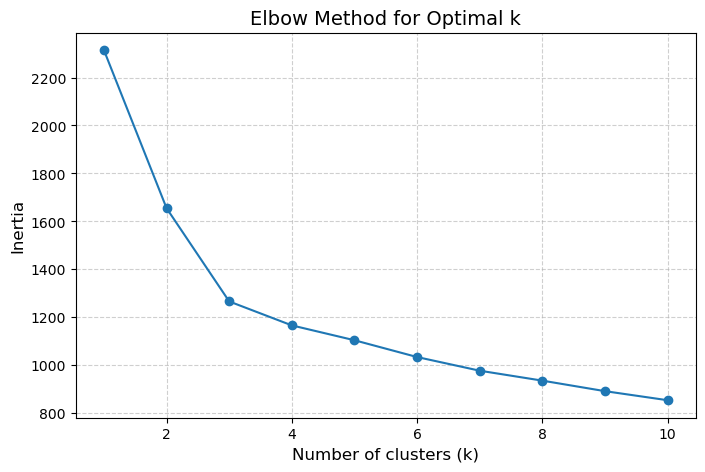

In [83]:
from sklearn.cluster import KMeans

# Assume df_scaled is your standardized dataset
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'o-', markersize=6)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#### 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [84]:
#import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Set k value based on elbow graph
k = 3 
#Apply K-means clustering 
kmeans = KMeans(n_clusters=k, random_state=42)
display(kmeans)
labels_kmeans = kmeans.fit_predict(df_scaled)

#Evaluate clusters
print("Silhouette Score (K-Means):", silhouette_score(df_scaled, labels_kmeans))

KMeans(n_clusters=3, random_state=42)

Silhouette Score (K-Means): 0.2854626783251893


#### 2.	Visualize the clustering results using appropriate plots.

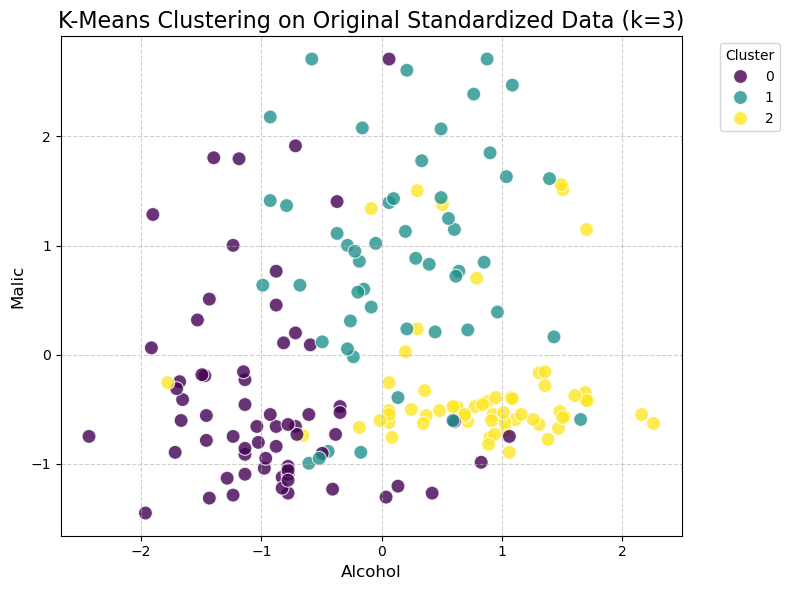

In [85]:
#Set k value
n_clusters_optimal = 3 

# Instantiate KMeans with the chosen number of clusters
kmeans_original = KMeans(n_clusters=n_clusters_optimal, random_state=42, n_init=10)

# Fit the KMeans model to the df_scaled DataFrame
kmeans_original.fit(df_scaled)

# Add the cluster labels to the df_scaled DataFrame
df_scaled['cluster_labels_original'] = kmeans_original.labels_

# Visualize the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Alcohol', y='Malic', hue='cluster_labels_original', data=df_scaled, palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering on Original Standardized Data (k={n_clusters_optimal})', fontsize=16)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Malic', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [86]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(df_scaled, labels_kmeans)
db_index = davies_bouldin_score(df_scaled, labels_kmeans)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies–Bouldin Index: {db_index:.3f}")


Silhouette Score: 0.321
Davies–Bouldin Index: 1.264


## Task 4: Clustering with PCA Data:

#### 1.	Apply the same clustering algorithm to the PCA-transformed dataset.

In [87]:
#import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Set k value based on elbow graph
k = 3 
#Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
display(kmeans)
labels_kmeans = kmeans.fit_predict(df_pca_final)

#validation
s_score=silhouette_score(df_pca_final, labels_kmeans)
db_index_score = davies_bouldin_score(df_scaled, labels_kmeans)

#Evaluate clusters
print(f"Silhouette Score: {s_score:.3f}")
print(f"Davies–Bouldin Index: {db_index_score:.3f}")

KMeans(n_clusters=3, random_state=42)

Silhouette Score: 0.315
Davies–Bouldin Index: 1.264


#### 2.	Visualize the clustering results obtained from PCA-transformed data.

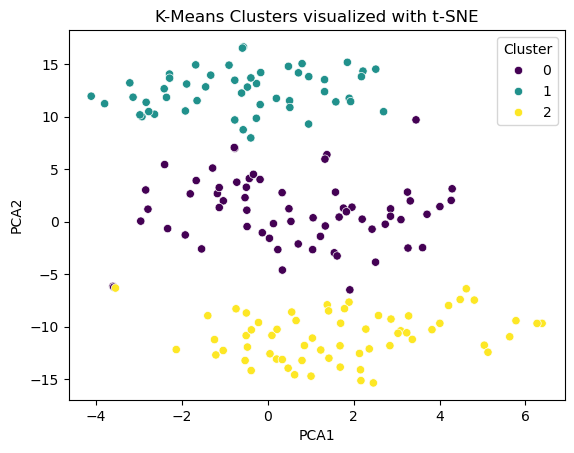

In [88]:
#import tsne library
from sklearn.manifold import TSNE

#Build clustering
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_pca_final)

#create dataframe
df_tsne_kmeans = pd.DataFrame(df_tsne, columns=['PCA1', 'PCA2'], index=df.index)
df_tsne_kmeans['Cluster'] = labels_kmeans

#plot scatter plot
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_tsne_kmeans, palette='viridis')
plt.title('K-Means Clusters visualized with t-SNE')
plt.show()

#### 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

In [89]:
#create dictionary
pcs_comp = {
            'Performance Metrics': ["original", "PCA-transformed"],
            'Silhouette Score': [f"{sil_score:.4f}",f"{s_score:.4f}"],
            'Davies–Bouldin index': [f"{db_index:.4f}",f"{db_index_score:.4f}"]
}
#Create DataFrame
res_comp=pd.DataFrame(pcs_comp)
res_comp

,Performance Metrics,Silhouette Score,Davies–Bouldin index
0,original,0.3208,1.2645
1,PCA-transformed,0.3153,1.2645


##### - PCA-transformed dataset has higher Silhouette Score compared to the original dataset.
##### - There is no difference in Davies–Bouldin index score.

## Task 5: Comparison and Analysis:

#### 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [48]:
#create dictionary
pcs_comp = {
            'Performance Metrics': ["original", "PCA-transformed"],
            'Silhouette Score': [f"{sil_score:.4f}",f"{s_score:.4f}"],
            'Davies–Bouldin index': [f"{db_index:.4f}",f"{db_index_score:.4f}"]
}
#Create DataFrame
res_comp=pd.DataFrame(pcs_comp)
res_comp

,Performance Metrics,Silhouette Score,Davies–Bouldin index
0,original,0.2855,1.3816
1,PCA-transformed,0.3153,1.3816


##### Compare the clustering results:
**Silhouette Score:**

- Original: 0.2855

- PCA-transformed: 0.3153

Higher is better. The PCA-transformed dataset shows a slight improvement, meaning clusters are a bit more compact and better separated.

**Davies–Bouldin Index**

- Both: 1.3816

Lower is better. Since both values are identical, PCA did not change the average similarity between clusters.

#### 2.	Discuss any similarities or differences observed in the clustering results.

#### **Similarities and Differences:**

**Similarities:** In both cases, K-Means identified three clusters, suggesting that there might be an inherent structure for three groups within the wine dataset. 

**Differences:** The most significant difference is the clarity and separation of the clusters. PCA-transformed data resulted in much better-defined and more cohesive clusters, as evidenced by both the visual inspection and the silhouette score. The original standardized data, despite standardization, presented a more ambiguous clustering structure when evaluated with the silhouette score.

#### 3.	Reflect on the impact of dimensionality reduction on clustering performance.

##### **Impact of Dimensionality Reduction (PCA) on Clustering Performance:**
In this case, PCA significantly improved the clustering performance. The silhouette score increased (from 0.2855 to 0.3151) after applying PCA. This improvement can be attributed to several factors:

**Noise Reduction:** PCA effectively reduced noise and redundant information by transforming the data into a new set of orthogonal components that capture the most variance. This can help the clustering algorithm focus on the most important underlying patterns.

**Feature Decorrelation:** PCA creates uncorrelated principal components, which can be beneficial for distance-based algorithms like K-Means. In high-dimensional spaces with correlated features, distance metrics can be distorted, making it harder for K-Means to identify natural clusters.

**Enhanced Separability:** By projecting the data onto a lower-dimensional space (PC1 and PC2), PCA can sometimes enhance the separability of clusters that might be obscured in the original high-dimensional space due to complex interactions between many features.

In conclusion, using PCA as a preprocessing step before K-Means clustering led to more distinct, better-separated, and more robust clusters for the wine dataset, indicating that dimensionality reduction was highly beneficial for this analysis.

#### 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

##### The trade-offs between using PCA and clustering directly on the original dataset are as follows:

- **Clustering without PCA (on original standardized data)** is suitable when interpretability of clusters in terms of original features is paramount, when the dataset's dimensionality is not excessively high, or when the underlying structure is well-captured by the original features without significant noise or multicollinearity.

- **Clustering with PCA (on PCA-transformed data)** is recommended when dealing with high-dimensional datasets, when multicollinearity among features is present, or when noise reduction and enhanced cluster separability are desired. PCA helps by reducing noise, decorrelating features, and projecting data into a lower-dimensional space that might reveal clearer cluster structures, as demonstrated in this analysis.

## Task 6: Conclusion and Insights

#### 1.	Summarize the key findings and insights from the assignment.

#### **Keyfindings and insights:**
1. **Exploratory Data Analysis (EDA)**
   - Histograms, box plots, and density plots revealed insights into the data distribution, presence of outliers, and feature variability.
   - The correlation matrix heatmap highlighted the relationships between features, indicating some strong correlations.

2. **Dimensionality Reduction with PCA**
   - PCA was successfully applied to reduce the dimensionality of the dataset.
   - The scree plot and cumulative explained variance plot helped determine the optimal number of principal components, ensuring that a significant amount of variance in the data was retained.
   - The dataset was transformed into principal components, simplifying the structure while preserving essential information.

3. **Clustering with Original Data**
   - K-Means clustering was applied to the original dataset.
   - The optimal number of clusters was determined using the Elbow method.
   - The clustering results were visualized, and the performance was evaluated using the silhouette score and Davies Bouldin index.

4. **Clustering with PCA Data**
   - K-Means clustering was also applied to the PCA-transformed dataset.
   - The clustering results from the PCA-transformed data were visualized.
   - The performance metrics were compared to those from the original dataset.

5. **Comparison and Analysis**
   - The silhouette scores and Davies Bouldin indices from both the original and PCA transformed datasets were compared.
   - The PCA-transformed data often resulted in improved clustering performance, demonstrating the benefits of dimensionality reduction.

#### 2.	Discuss the practical implications of using PCA and clustering in data analysis.

##### 1. **Dimensionality Reduction**
   - PCA reduces the complexity of the dataset by transforming it into a lower-dimensional space, retaining the most important information.
   - PCA offers benefits in dimensionality reduction, noise reduction, and feature extraction, which simplifies data visualization and can improve the performance of subsequent machine learning models.

     
##### 2. **Clustering**
   -  Clustering is crucial for identifying natural groupings or segments within data, facilitating tasks such as market segmentation, anomaly detection, or gaining a deeper understanding of the data's inherent structure.
   - Clustering algorithms, such as K-Means, group similar data points together, uncovering hidden structures in the data.
   - When applied to high-dimensional data, clustering can suffer from the "curse of dimensionality," leading to poor performance and interpretability.
   - Dimensionality reduction techniques like PCA can mitigate these issues by simplifying the data structure.

#### 3.	Provide recommendations for when to use each technique based on the analysis conducted.

##### 1. **When to Use PCA:**
   - **High-Dimensional Data:** When dealing with datasets with a large number of features, PCA can help reduce dimensionality and improve clustering performance.
   - **Noise Reduction:** If the data contains a lot of noise, PCA can help filter out irrelevant information, focusing on the most significant features.
   - **Visualization:** PCA is useful for visualizing high-dimensional data in 2D or 3D plots, making it easier to understand the data distribution and cluster structures.

##### 2. **When to Use Clustering:**
   - **Low-Dimensional Data:** If the dataset has a manageable number of features, direct clustering can be straightforward and effective.
   - **Feature Importance:** When the original features are interpretable and significant for the analysis, clustering without dimensionality reduction can preserve this interpretability.
   - **Initial Analysis:** Direct clustering can provide a baseline understanding of the data structure, which can then be compared with results from PCA-transformed data.